<a href="https://colab.research.google.com/github/Girish583kumar/Car-Data-Analytics/blob/main/Ipl_data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
ipl=pd.read_csv('/content/ipl_2023_dataset.csv')
ipl.head()

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,GT
1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,GT
2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,GT
3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,GT
4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,GT


#Data Exploration

In [ ]:
print("Number of rows: ",ipl.shape[0])
print("Number of columns: ",ipl.shape[1])

Number of rows:  568
Number of columns:  7


In [ ]:
print("Number of elements in the dataset: ",ipl.size)

Number of elements in the dataset:  3976


In [ ]:
ipl.index

RangeIndex(start=0, stop=568, step=1)

In [ ]:
ipl.columns

Index(['Player Name', 'Base Price', 'Type', 'Cost in Rs. (CR)',
       'Cost in $ (K)', '2022 Squad', '2023 Squad'],
      dtype='object')

In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player Name       568 non-null    object 
 1   Base Price        568 non-null    object 
 2   Type              568 non-null    object 
 3   Cost in Rs. (CR)  243 non-null    float64
 4   Cost in $ (K)     243 non-null    float64
 5   2022 Squad        230 non-null    object 
 6   2023 Squad        568 non-null    object 
dtypes: float64(2), object(5)
memory usage: 31.2+ KB


In [ ]:
ipl.describe()

,Cost in Rs. (CR),Cost in $ (K)
count,243.000000,243.000000
mean,0.687243,82.469136
std,2.511700,301.404032
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.200000,24.000000
max,18.500000,2220.000000


In [ ]:
ipl.describe(include="object")

,Player Name,Base Price,Type,2022 Squad,2023 Squad
count,568,568,568,230,568
unique,565,10,4,10,11
top,Akash Singh,2000000,ALL-ROUNDER,MI,Unsold
freq,2,274,213,28,325


In [ ]:
for col in ipl.describe(include="object").columns :
    print(col)
    print(ipl[col].unique())
    print("***"*40)

Player Name
['Shivam Mavi' 'Joshua Little' 'Kane Williamson' 'K.S. Bharat'
 'Mohit Sharma' 'Odean Smith' 'Urvil Patel' 'Rahul Tewatia'
 'Pradeep Sangwan' 'Rashid Khan' 'R. Sai Kishore' 'Yash Dayal'
 'Noor Ahmad' 'Wriddhiman Saha' 'Vijay Shankar' 'Shubman Gill'
 'Hardik Pandya' 'B. Sai Sudharsan' 'Alzarri Joseph' 'Abhinav Sadarangani'
 'Darshan Nalkande' 'David Miller' 'Matthew Wade' 'Jayant Yadav'
 'Mohammad Shami' 'Ben Stokes' 'Kyle Jamieson' 'Nishant Sindhu'
 'Ajinkya Rahane' 'Bhagath Varma' 'Ajay Mandal' 'Shaik Rasheed'
 'Ravindra Jadeja' 'Rajvardhan Hangargekar' 'Prashant Solanki'
 'Ruturaj Gaikwad' 'Tushar Deshpande' 'Mukesh Choudhary'
 'Subhranshu Senapati' 'Simarjeet Singh' 'Shivam Dube'
 'Matheesha Pathirana' 'Devon Conway' 'Deepak Chahar' 'Ambati Rayudu'
 'Dwaine Pretorius' 'Maheesh Theekshana' 'Moeen Ali' 'Mitchell Santner'
 'MS Dhoni' 'Mukesh Kumar' 'Rilee Rossouw' 'Manish Pandey' 'Phil Salt'
 'Ishant Sharma' 'Ripal Patel' 'Pravin Dubey' 'Rishabh Pant'
 'Prithvi Shaw' 'Syed 

In [ ]:
# checking null values
ipl.isnull().sum()

Player Name           0
Base Price            0
Type                  0
Cost in Rs. (CR)    325
Cost in $ (K)       325
2022 Squad          338
2023 Squad            0
dtype: int64

In [ ]:
#price cr column has null values , filling the empty cells with mean price cr value
ipl["Cost in Rs. (CR)"].fillna(ipl["Cost in Rs. (CR)"].mean(),inplace=True)

In [ ]:
ipl.isnull().sum()

Player Name           0
Base Price            0
Type                  0
Cost in Rs. (CR)      0
Cost in $ (K)       325
2022 Squad          338
2023 Squad            0
dtype: int64

In [ ]:
#price $ column has null values , filling the empty cells with mean price $ value
ipl["Cost in $ (K)"].fillna(ipl["Cost in $ (K)"].mean(),inplace=True)

In [ ]:
ipl.isnull().sum()

Player Name           0
Base Price            0
Type                  0
Cost in Rs. (CR)      0
Cost in $ (K)         0
2022 Squad          338
2023 Squad            0
dtype: int64

In [ ]:
#checking duplicate values
ipl.duplicated().sum()

0

#Data Analysis


In [ ]:
ipl.head()

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,GT
1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,GT
2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,GT
3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,GT
4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,GT


In [ ]:
#number of players in each team
ipl2=ipl.groupby("2023 Squad")["Player Name"].count().sort_values(ascending=False)
ipl2

2023 Squad
Unsold    325
CSK        25
DC         25
GT         25
LSG        25
RCB        25
RR         25
SRH        25
MI         24
KKR        22
PBKS       22
Name: Player Name, dtype: int64

In [ ]:
#number of players in each team
ipl3=ipl.groupby("2022 Squad")["Player Name"].count().sort_values(ascending=False)
ipl3

2022 Squad
MI      28
CSK     24
PBKS    24
RR      24
DC      23
GT      22
KKR     22
SRH     22
LSG     21
RCB     20
Name: Player Name, dtype: int64

In [ ]:
#number of players of each type
ipl4=ipl.groupby("Type")["Player Name"].count().sort_values(ascending=False)
ipl4

Type
ALL-ROUNDER     213
BOWLER          189
BATSMAN          91
WICKETKEEPER     75
Name: Player Name, dtype: int64

In [ ]:
#Top five highest paid players of 2023
ipl1=ipl.sort_values(by="Cost in Rs. (CR)",ascending=False)
ipl1[["Player Name","Cost in Rs. (CR)"]][:5].set_index("Player Name")

,Cost in Rs. (CR)
Player Name,
Sam Curran,18.50
Cameron Green,17.50
Ben Stokes,16.25
Nicholas Pooran,16.00
Harry Brook,13.25


In [ ]:
ipl5=ipl.groupby("2022 Squad")["Cost in Rs. (CR)"].sum().sort_values(ascending=False)
ipl5

2022 Squad
SRH     22.823457
PBKS    12.298971
LSG     10.898971
KKR     10.623457
MI       6.960700
RR       5.497942
CSK      3.461728
GT       2.748971
DC       2.387243
RCB      1.374486
Name: Cost in Rs. (CR), dtype: float64

In [ ]:
ipl6=ipl.groupby("2023 Squad")["Cost in Rs. (CR)"].sum().sort_values(ascending=False)
ipl6

2023 Squad
Unsold    223.353909
SRH        35.700000
MI         20.500000
PBKS       20.000000
LSG        19.800000
CSK        18.950000
DC         15.000000
GT         14.800000
RR          9.850000
RCB         7.000000
KKR         5.400000
Name: Cost in Rs. (CR), dtype: float64

In [ ]:
ipl7=ipl.groupby("Type")["Cost in Rs. (CR)"].sum().sort_values()
ipl7

Type
WICKETKEEPER     58.525926
BATSMAN          70.862140
BOWLER          103.623251
ALL-ROUNDER     157.342593
Name: Cost in Rs. (CR), dtype: float64

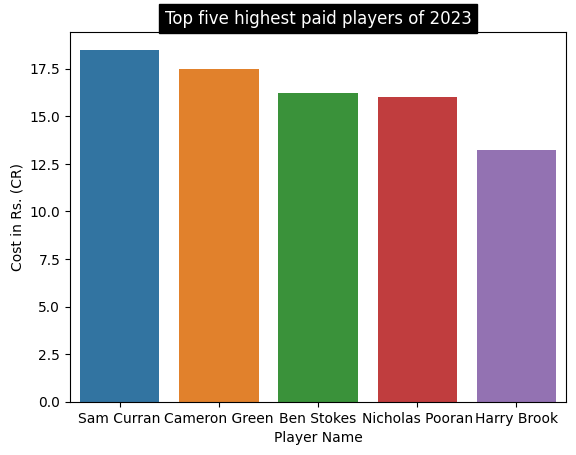

In [ ]:
sns.barplot(x="Player Name",y="Cost in Rs. (CR)",data=ipl1[:5])
plt.xlabel("Player Name")
plt.ylabel("Cost in Rs. (CR)")
plt.title("Top five highest paid players of 2023",bbox={"facecolor":"black"},color="white")
plt.show()

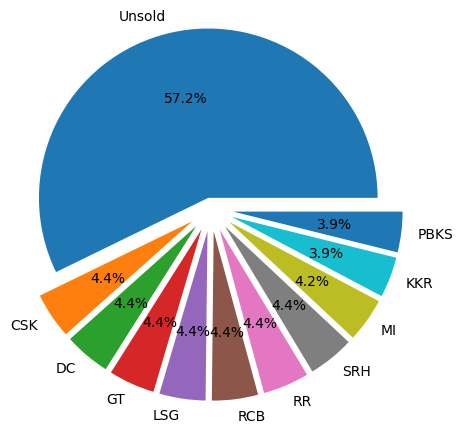

In [ ]:
plt.pie(ipl2,labels=ipl2.index,explode=[0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2],autopct="%0.01f%%",radius=1.5)
#plt.title("percent of players in each team",bbox={"facecolor":"black"},color="white")
plt.tight_layout()
plt.show()

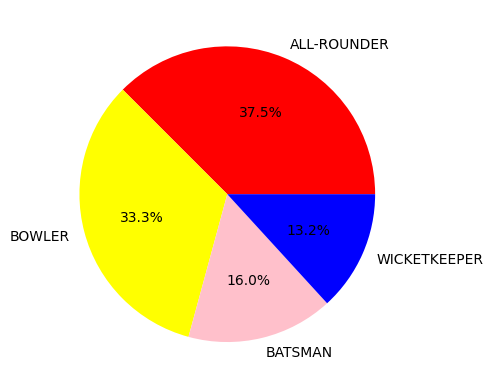

In [ ]:
plt.pie(ipl4,labels=ipl4.index,autopct="%0.01f%%",colors=["red","yellow","pink","blue"])
#plt.legend()
plt.show()

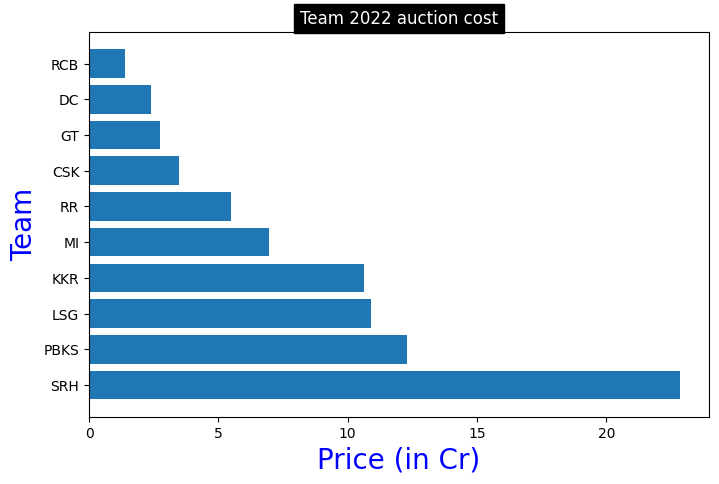

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(ipl5.index,ipl5.values)
plt.xlabel("Price (in Cr)",color="blue",size=20)
plt.ylabel("Team",color="blue",size=20)
plt.title("Team 2022 auction cost",bbox={"facecolor":"black"},color="white")
plt.show()

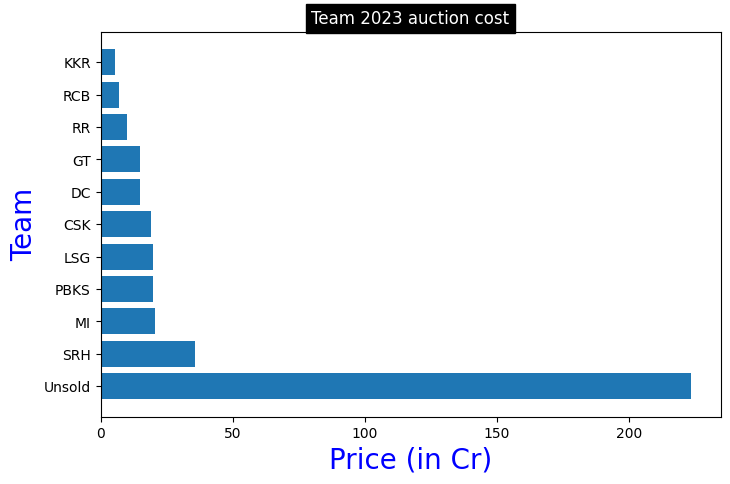

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(ipl6.index,ipl6.values)
plt.xlabel("Price (in Cr)",color="blue",size=20)
plt.ylabel("Team",color="blue",size=20)
plt.title("Team 2023 auction cost",bbox={"facecolor":"black"},color="white")
plt.show()

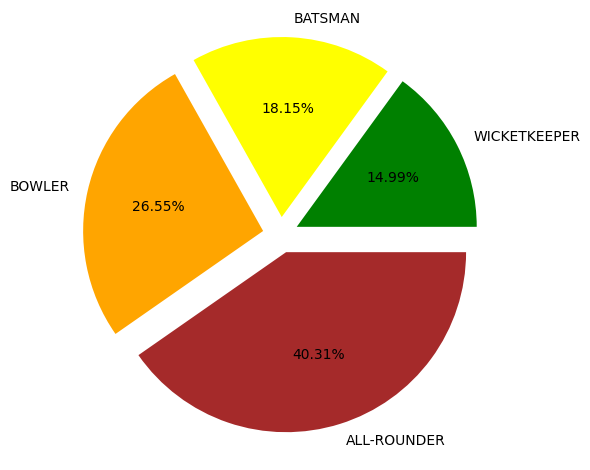

In [ ]:
plt.pie(ipl7,labels=ipl7.index,autopct="%0.2f%%",colors=["green","yellow","orange","brown"],explode=[0.1,0.1,0.1,0.1])
plt.tight_layout()
plt.show()

In [ ]:
ipl.Type=='Bowler'

0      False
1      False
2      False
3      False
4      False
       ...  
563    False
564    False
565    False
566    False
567    False
Name: Type, Length: 568, dtype: bool

In [ ]:
ipl=ipl.rename(columns={"2023 Squad":"presentSquad"})

In [ ]:
ipl[ipl.presentSquad=='MI']

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,presentSquad
144,Cameron Green,20000000,ALL-ROUNDER,17.5,2100.0,NaN,MI
145,Jhye Richardson,1500000,BOWLER,1.5,180.0,NaN,MI
146,Piyush Chawla,5000000,BOWLER,0.5,60.0,NaN,MI
147,Raghav Goyal,2000000,BOWLER,0.2,24.0,NaN,MI
148,Shams Mulani,2000000,ALL-ROUNDER,0.2,24.0,NaN,MI
149,Nehal Wadhera,2000000,ALL-ROUNDER,0.2,24.0,NaN,MI
150,Vishnu Vinod,2000000,WICKETKEEPER,0.2,24.0,SRH,MI
151,Duan Jansen,2000000,ALL-ROUNDER,0.2,24.0,NaN,MI
152,Ramandeep Singh,Retained,ALL-ROUNDER,0.0,0.0,MI,MI
153,N. Tilak Varma,Retained,ALL-ROUNDER,0.0,0.0,MI,MI
